In [1]:
import pymicra
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt

fconfig = pymicra.fileConfig('tij_pr_qc.config')

In [2]:
fnames = sorted(glob('mydata/*.out'))
# Prints reports on screen and writes further info to file
pymicra.util.qc_replace(fnames, fconfig,
    file_lines=36000,
    lower_limits=dict(theta_v=10, mrho_h2o=0, mrho_co2=0),
    upper_limits=dict(theta_v=45),
    spikes_test=True,
    max_replacement_count=360,
    chunk_size=1200,
    outdir='out1',
    replaced_report='rrep.txt')

fnames2 = sorted(glob('out1/*.out'))
# Prints reports on screen and writes further info to file
pymicra.util.qc_discard(fnames2, fconfig,
    std_limits = dict(u=0.03, v=0.03, w=0.01, theta_v=0.02),
    dif_limits = dict(u=4.0, v=4.0, w=1.0, theta_v=2.0),
    chunk_size=1200,
    outdir='out2',
    summary_file='discard_summary.csv',
    full_report='frep.txt')


20110224-1220.out
Passed all tests
Re-writing mydata/20110224-1220.out

20110224-1250.out
Passed all tests
Re-writing mydata/20110224-1250.out

20110224-1340.out
Passed all tests
Re-writing mydata/20110224-1340.out

20110224-1410.out
Passed all tests
Re-writing mydata/20110224-1410.out

20110224-1440.out
Passed all tests
Re-writing mydata/20110224-1440.out

20110224-1510.out
Passed all tests
Re-writing mydata/20110224-1510.out

20110224-1610.out
Passed all tests
Re-writing mydata/20110224-1610.out

20110224-1640.out
Passed all tests
Re-writing mydata/20110224-1640.out

                           control  percent
total                            8    100.0
failed lines test                0      0.0
failed replacement test          0      0.0
passed all tests                 8    100.0
Runs with replaced nans          0      0.0
Runs with replaced bound         0      0.0
Runs with replaced spikes        8    100.0
20110224-1220.out
20110224-1220.out : !FAILED failed maxdif test test!



,passed all tests,total,failed STD test,failed maxdif test
0,NaN,20110224-1220.out,NaN,20110224-1220.out
1,NaN,20110224-1250.out,NaN,20110224-1250.out
2,20110224-1340.out,20110224-1340.out,NaN,NaN
3,NaN,20110224-1410.out,NaN,20110224-1410.out
4,20110224-1440.out,20110224-1440.out,NaN,NaN
5,NaN,20110224-1510.out,NaN,20110224-1510.out
6,NaN,20110224-1610.out,NaN,20110224-1610.out
7,20110224-1640.out,20110224-1640.out,NaN,NaN


In [3]:
fconfig = pymicra.fileConfig('tij_pr.config')
sconfig = pymicra.siteConfig('tij_pr.site')
fname = 'out2/20110224-1340.out'

data, units = pymicra.timeSeries(fname, fconfig, parse_dates=False)
# Prints reports showing which calculations are being done
data = pymicra.micro.preProcess(data, units, solutes=['co2'])
fulldata = data.detrend(units=units, ignore=['p'], join_data=True)

# Prints reports showing which calculations are being done
results = pymicra.micro.eddyCovariance(fulldata, units, 
                                site_config=sconfig, 
                                wpl=True, solutes=['co2'])
print(results.with_units(units))

Beginning of pre-processing ...
Rotating data with 2d method ... Done!
Converting theta_v to kelvin ... Done!
Didn't locate mass density of h2o. Trying to calculate it ... Done!
Moist air density not present in dataset
Calculating rho_air = p/(Rdry * theta_v) ... Done!
Calculating dry_air mass_density = rho_air - rho_h2o ... Done!
Dry air molar density not in dataset
Calculating dry_air molar_density = rho_dry / dry_air_molar_mass ... Done!
Calculating specific humidity = rho_h2o / rho_air ... Done!
Calculating h2o mass mixing ratio = rho_h2o / rho_dry ... Done!
Calculating h2o molar mixing ratio = rho_h2o / rho_dry ... Done!
Thermodynamic temperature not found ... trying to calculate it with theta_v ~ theta (1 + 0.61 q) relation ... done!
Didn't locate mass density of co2. Trying to calculate it ... Done!
Calculating co2 mass concentration (g/g) = rho_co2 / rho_air ... Done!
Calculating co2 mass mixing ratio = rho_co2 / rho_dry ... Done!
Calculating co2 molar mixing ratio = mrho_co2 /

,tau,H,Hv,E,LE,F_co2,u_star,theta_v_star,theta_star,mrho_h2o_star,mrho_co2_star,Lo,zeta,q_star,conc_co2_star
,<kilogram / meter / second ** 2>,<watt / meter ** 2>,<watt / meter ** 2>,<millimole / meter ** 2 / second>,<watt / meter ** 2>,<millimole / meter ** 2 / second>,<meter / second>,<kelvin>,<kelvin>,<millimole / meter ** 3>,<millimole / meter ** 3>,<meter>,<dimensionless>,<dimensionless>,<dimensionless>
0,0.034587,-18.135628,-5.744854,3.930086,173.166173,-0.012771,0.180323,-0.029847,-0.094221,21.794729,-0.070824,83.302161,0.022208,0.000369,-0.000003


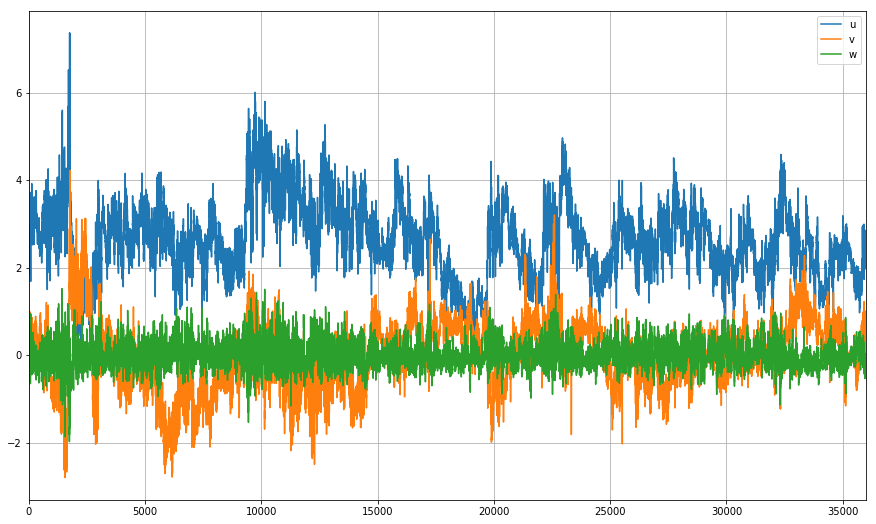

In [4]:
data[['u', 'v', 'w']].plot(figsize=(15,9), grid=True)
plt.show()

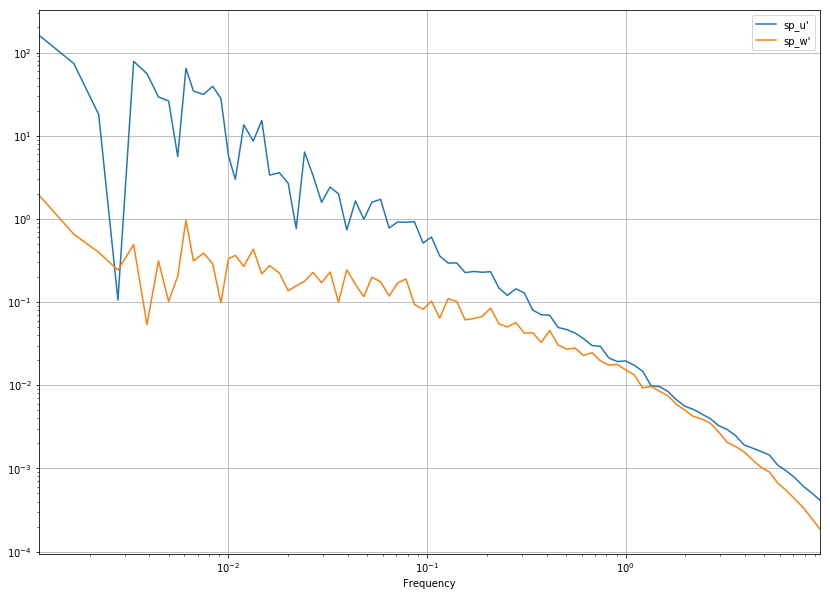

In [5]:
uw_spectra = pymicra.spectra(fulldata[["u'", "w'"]], 
                        frequency=20, anti_aliasing=True)
uw_spectra.binned(bins_number=100).plot(loglog=True, 
                                        grid=True, figsize=(14,10))
plt.show()